In [1]:
#This script opens the citation dataset and perform calculations in patent level
#Renato Kogeyama

#Miami, Jan 25, 2020
#This code could really use a cleaning
#I updated it t use clean uspatentcitation
#but i could update the name of the dataframes so they are more meaningful


#Miami, December 29th, 2019
# The script runs in about 20 min with the full dataset - excellent!
# The main change was in the philosophy of the code - ditching for loops
# This version includes application data calculate time variables 
# The idea is to evaluate changes in patent policy and evaluate time to citation

#Miami, December 27th, 2019
# Due bad performance, I am updating the script to more efficient coding

# This script generates a citation ouput with patent|backward citation|cumulated backward citation | year
# The output generates a citation record by year, considering direct and indirect citation


In [2]:
import pandas as pd
import numpy as np
import re

import sys
sys.path.append('/home/rkogeyam/scripts/')
from sampler import sampler


In [3]:
%matplotlib inline

In [4]:
# fname = r'/home/rkogeyam/PATENT_CITATION/data/uspatentcitation.tsv'
fname = r'/home/rkogeyam/PATENT_CITATION/data/cleanuspatentcitation.csv'
dst = '/home/rkogeyam/PATENT_CITATION/data/cit_tree.csv'

In [5]:
%%time
df=pd.read_csv(fname, usecols=['patent_id','citation_id'], dtype=object)

# sample_size=100
# df=sampler(fname, sample_size, sep='\t')

CPU times: user 2min 15s, sys: 9.75 s, total: 2min 25s
Wall time: 2min 25s


In [6]:
df.dtypes

patent_id      object
citation_id    object
dtype: object

In [7]:
df['patent_id']=df['patent_id'].astype(str)
df['citation_id']=df['citation_id'].astype(str)

In [8]:
df.dtypes

patent_id      object
citation_id    object
dtype: object

In [9]:
#this is the trick code
#I match the total of citations received by the citing patent (identified by patent_id)
#Then I sum all citations received by the citing patents
cit_received=pd.read_csv('data/cit_received.csv', usecols=['citation_id','cit_received'], dtype=object)
df=df.merge(cit_received, how='inner', left_on='patent_id', right_on='citation_id')
df.rename(columns={'back_citation': 'parent_cit_received'}, inplace=True)

In [10]:
cit_received.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7048984 entries, 0 to 7048983
Data columns (total 2 columns):
citation_id     object
cit_received    object
dtypes: object(2)
memory usage: 107.6+ MB


In [11]:
del cit_received

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69189682 entries, 0 to 69189681
Data columns (total 4 columns):
patent_id        object
citation_id_x    object
citation_id_y    object
cit_received     object
dtypes: object(4)
memory usage: 2.6+ GB


In [13]:
#merging generates new NaNs
#NaN in citations means no citation
df.fillna(0, inplace=True)

In [14]:
df.sample(n=10) # i dont know if the dataframe has the column name called in the following code

,patent_id,citation_id_x,citation_id_y,cit_received
84109,8175673,6770729,8175673,1
1176594,9282966,5868760,9282966,96
20085956,6004348,5571173,6004348,258
51427020,8799678,7321910,8799678,1
36896118,8589402,5754939,8589402,3
30412238,6556908,5703776,6556908,106
30588533,6119319,4771659,6119319,1
50150659,4899393,4707786,4899393,14
49272867,D687197,D431334,D687197,6
31981094,8191643,5027894,8191643,3


In [15]:
df['cit_received']=df['cit_received'].astype(int)

In [16]:
#now I collapse df to become a patent level dataframe
#citation_id_x is the original cited patent
df=df.groupby('citation_id_x').sum()

In [17]:
df.rename(columns={'cit_received': 'parent_citation'}, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6258912 entries, 0 to re25727
Data columns (total 1 columns):
parent_citation    int64
dtypes: int64(1)
memory usage: 95.5+ MB


In [19]:
df.describe()

,parent_citation
count,6.258912e+06
mean,2.472189e+02
std,1.588033e+03
min,1.000000e+00
25%,9.000000e+00
50%,3.600000e+01
75%,1.290000e+02
max,2.274790e+05


In [20]:
df.sample(n=10)

,parent_citation
citation_id_x,
5684308,458
1789188,73
3806458,620
D495602,132
3066662,93
7048008,25
2463838,19
D652938,46
5490111,97


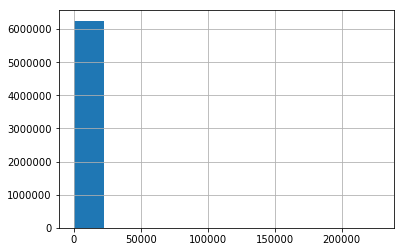

In [21]:
df['parent_citation'].hist()

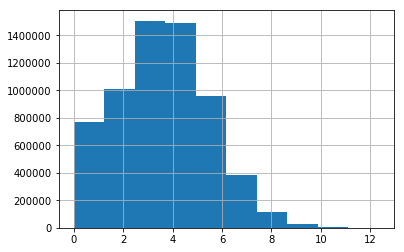

In [22]:
np.log(df['parent_citation']).hist()

In [23]:
df.to_csv(dst)

In [24]:
# now i merge the number of citations to patent_level_df
# patent_level has the information about the citing patent

# this merge is inner because not all patents in patent_level_df will have citations

# outcome=cited_patents.merge(patent_level_df, how='inner', left_on='citation_id', right_index=True)

In [25]:
# outcome.head()

In [26]:
# outcome=outcome.merge(forward_citation, how='inner', left_on='citation_id', right_on='patent_id')

In [27]:
# outcome.head()

In [28]:
# outcome.fillna(0, inplace=True)

In [29]:
# outcome.head()

In [30]:
# outcome.drop(['patent_id'], axis=1, inplace=True)

In [31]:
# outcome.set_index('citation_id')

In [32]:
# outcome.drop(df['citation_id'].apply(lambda x: len(x)<4).index)

In [33]:
# outcome.describe()

In [34]:
# outcome.to_csv(dst)

In [35]:
# I should introduce a test to see if the script is calculating correctly
# I should search for the information of one specfic patent and compare with the output generated by the script

In [36]:
# # some data cleaning

# # here I should keep the information for further analysis

# # drop rows in which column citation_id has a length smaller than 5
# indexNames = df[df['citation_id'].map(len) < 5].index
# df.drop(indexNames , inplace=True)

# # drop rows for which column patent_id has a length smaller than 5
# indexNames = df[df['patent_id'].map(len) < 5].index
# df.drop(indexNames , inplace=True)

In [37]:
# %%time
# # # Keep this for reference!
# # # As of Dec 31st, 2019, I compared the clean to the raw version of citation and patent ids

# # #stripping non-desired characters but keeping the originals for later check - only three changes in citation_id

# df['citation_id_raw']=df['citation_id']
# df['patent_id_raw']=df['patent_id']

# cleaning_patent=lambda x:re.sub('([^a-zA-Z0-9]+)', "", x)
# df['citation_id']=df['citation_id'].apply(cleaning_patent)
# df['patent_id']=df['patent_id'].apply(cleaning_patent)

# # #stripping trailing white spaces - no changes
# # df['patent_id'] = df['patent_id'].str.strip()
# # df['citation_id'] = df['citation_id'].str.strip()

# # #this is taking a lot of time, evaluate alternatives

# print(df[df['citation_id'].map(len) > 8])